In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
import folium

In [2]:
url='https://raw.githubusercontent.com/Fidaeic/IBM-capstone/master/Centroides_Barrios_Malaga.json'
archivo = requests.get(url).json()

In [3]:
malaga_datos=archivo['features']

In [4]:
barrios=pd.DataFrame()
for data in malaga_datos:
    id_barrio  = data['properties']['NUMBARRIO'] 
    nombre_barrio = data['properties']['NOMBARRIO']
        
    latlon = data['geometry']['coordinates']
    lat = latlon[1]
    lon = latlon[0]
    
    barrios = barrios.append({'Num_barrio': id_barrio,
                                          'Nombre': nombre_barrio.lower().capitalize(),
                                          'Latitud': lat,
                                          'Longitud': lon}, ignore_index=True)
barrios["Num_barrio"]=barrios["Num_barrio"].map(lambda x: int(x))
barrios.head()

,Latitud,Longitud,Nombre,Num_barrio
0,36.651810,-4.514196,Cañada de ceuta,307
1,36.662529,-4.513345,San juan-el albaricocal,321
2,36.735346,-4.427377,La rosaleda,109
3,36.739066,-4.428161,503 viviendas,378
4,36.740912,-4.429205,La palmilla,107


In [5]:
barrios.sort_values("Nombre")

,Latitud,Longitud,Nombre,Num_barrio
284,36.701313,-4.440729,25 años de paz,162
8,36.741873,-4.428834,26 de febrero,106
56,36.713667,-4.444871,4 de diciembre,136
3,36.739066,-4.428161,503 viviendas,378
378,36.736574,-4.429669,720 viviendas,379
127,36.678051,-4.495256,Aeropuerto base aerea,331
281,36.702562,-4.441371,Alaska,161
190,36.751222,-4.420341,Alegria de la huerta,99
275,36.686885,-4.450298,Almudena,198
182,36.797028,-4.338401,Altos de jaboneros,528


# ANÁLISIS DE CLUSTERS GENERALES

In [6]:
CLIENT_ID = 'MQ2VBTWEJB22CCJS4SLRXEOZPXQ5GOUMQXOCSNW5Z02V1RV4' # your Foursquare ID
CLIENT_SECRET = 'MJ43MP3Y1J5ZQLSNQP2UVWWMF3N05YIYUR1ORYBOJZTKUJ2J' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']

        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Barrio', 
                  'Latitud_barrio', 
                  'Longitud_barrio', 
                  'Lugar', 
                  'Latitud_lugar', 
                  'Longitud_lugar', 
                  'Categoría']
    
    return(nearby_venues)

In [7]:
malaga_lugares = getNearbyVenues(names=barrios['Nombre'],
                                   latitudes=barrios['Latitud'],
                                   longitudes=barrios['Longitud']
                                  )

Cañada de ceuta
San juan-el albaricocal
La rosaleda
503 viviendas
La palmilla
Virreina
Herrera oria
Virreina alta
26 de febrero
Olletas
Jardin de la abadia
Haza del campillo
La consula
Seminario
Ensanche centro
Carranque
Cruz del humilladero
Parque las virreinas
El coronel
Campo de golf
Pizarrillo
Sierra blanquilla
Jardin de malaga
El palo
La cizaña
Parq emp perez texeira
Recinto ferial cortijo torres
Parq emp la estrella
Sagrada familia
Las erizas
Las cuevas
Miramar del palo
La pelusa
Centro historico
La merced
San felipe neri
Capuchinos
Camino de olias
El ejido
Lagunillas
Vega de oro
Campamento benitez
Miraflores
Playa virginia
Pol alameda
Cortijo de maza
Los chopos
Las niñas
Carambuco
Hacienda sanchez blanca
La estacion
La malagueta
Perchel sur
La aurora
Los tilos
Nucleo gral franco
4 de diciembre
Ntra sra del carmen
Los prados
La victoria
Nuevo san andres 1
Campos eliseos
Monte de gibralfaro
Pol ctra de cartama
La barriguilla
La pelusilla
Explanada de la estación
Finca el candado
L

In [8]:
malaga_lugares.shape

(4914, 7)

In [9]:
print('There are {} uniques categories.'.format(len(malaga_lugares['Categoría'].unique())))

There are 220 uniques categories.


In [10]:
malaga_onehot = pd.get_dummies(malaga_lugares[['Categoría']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
malaga_onehot['Barrio'] = malaga_lugares['Barrio'] 

# move neighborhood column to the first column
fixed_columns = [malaga_onehot.columns[-1]] + list(malaga_onehot.columns[:-1])
malaga_onehot = malaga_onehot[fixed_columns]

malaga_onehot.head()

,Barrio,Advertising Agency,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Museum,...,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Wine Bar,Wine Shop,Winery,Women's Store
0,Cañada de ceuta,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cañada de ceuta,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cañada de ceuta,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,San juan-el albaricocal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,San juan-el albaricocal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
malaga_grupo = malaga_onehot.groupby('Barrio').mean().reset_index()
malaga_grupo

,Barrio,Advertising Agency,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Museum,...,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Wine Bar,Wine Shop,Winery,Women's Store
0,25 años de paz,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.058824,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,26 de febrero,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,4 de diciembre,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,503 viviendas,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,720 viviendas,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,Aeropuerto base aerea,0.0,0.052632,0.052632,0.052632,0.052632,0.000000,0.0,0.000000,0.000000,...,0.052632,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,Alaska,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.083333,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,Alegria de la huerta,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,Almudena,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,Ardira,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0


In [12]:
from sklearn.cluster import KMeans
import folium

In [13]:
# set number of clusters
kclusters = 30

malaga_grupo_clustering = malaga_grupo.drop('Barrio', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(malaga_grupo_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 5,  0,  6, 12,  8,  8,  5,  9, 12, 12], dtype=int32)

In [14]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [15]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Barrio']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Barrio'] = malaga_grupo['Barrio']

for ind in np.arange(malaga_grupo.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(malaga_grupo.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,25 años de paz,Ice Cream Shop,Supermarket,Other Repair Shop,Playground,Metro Station,Museum,Historic Site,Café,Pharmacy,Art Museum,Flea Market,Bar,Snack Place,Restaurant,Seafood Restaurant
1,26 de febrero,Italian Restaurant,Ice Cream Shop,Breakfast Spot,Park,Grocery Store,Women's Store,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market
2,4 de diciembre,Plaza,Tapas Restaurant,Café,Grocery Store,Gym,Burger Joint,Coffee Shop,Food,Flower Shop,Event Space,Field,Fast Food Restaurant,Farmers Market,Food & Drink Shop,Food Court
3,503 viviendas,Park,Burger Joint,Mediterranean Restaurant,Women's Store,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
4,720 viviendas,Clothing Store,Sporting Goods Shop,Coffee Shop,Shopping Mall,Big Box Store,Science Museum,Café,Restaurant,Tapas Restaurant,Ice Cream Shop,Chinese Restaurant,Football Stadium,Cosmetics Shop,Soccer Stadium,Pizza Place


In [16]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [17]:
malaga_merged=barrios.set_index("Nombre").join(neighborhoods_venues_sorted.set_index("Barrio")).reset_index().rename({"index":"Barrio"},axis=1).dropna()
malaga_merged["Cluster Labels"]=malaga_merged["Cluster Labels"].map(lambda x: int(x))
malaga_merged

,Barrio,Latitud,Longitud,Num_barrio,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,25 años de paz,36.701313,-4.440729,162,5,Ice Cream Shop,Supermarket,Other Repair Shop,Playground,Metro Station,Museum,Historic Site,Café,Pharmacy,Art Museum,Flea Market,Bar,Snack Place,Restaurant,Seafood Restaurant
1,26 de febrero,36.741873,-4.428834,106,0,Italian Restaurant,Ice Cream Shop,Breakfast Spot,Park,Grocery Store,Women's Store,Event Space,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market
2,4 de diciembre,36.713667,-4.444871,136,6,Plaza,Tapas Restaurant,Café,Grocery Store,Gym,Burger Joint,Coffee Shop,Food,Flower Shop,Event Space,Field,Fast Food Restaurant,Farmers Market,Food & Drink Shop,Food Court
3,503 viviendas,36.739066,-4.428161,378,12,Park,Burger Joint,Mediterranean Restaurant,Women's Store,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
4,720 viviendas,36.736574,-4.429669,379,8,Clothing Store,Sporting Goods Shop,Coffee Shop,Shopping Mall,Big Box Store,Science Museum,Café,Restaurant,Tapas Restaurant,Ice Cream Shop,Chinese Restaurant,Football Stadium,Cosmetics Shop,Soccer Stadium,Pizza Place
5,Aeropuerto base aerea,36.678051,-4.495256,331,8,Ice Cream Shop,Coffee Shop,Rental Car Location,Gastropub,Electronics Store,Duty-free Shop,Bakery,Restaurant,Seafood Restaurant,Spanish Restaurant,Burger Joint,Train Station,Airport Terminal,Airport Service,Airport Lounge
6,Alaska,36.702562,-4.441371,161,5,Ice Cream Shop,Art Museum,Flea Market,Farmers Market,Other Repair Shop,Supermarket,Pharmacy,Metro Station,Historic Site,Museum,Snack Place,Flower Shop,Falafel Restaurant,Food,Food & Drink Shop
7,Alegria de la huerta,36.751222,-4.420341,99,9,Mexican Restaurant,Park,Bar,Grocery Store,Gym / Fitness Center,Seafood Restaurant,BBQ Joint,Field,Flea Market,Farmers Market,Flower Shop,Food,Falafel Restaurant,Food & Drink Shop,Event Space
8,Almudena,36.686885,-4.450298,198,12,Pub,Restaurant,Spanish Restaurant,Tapas Restaurant,Café,Board Shop,Pizza Place,Seafood Restaurant,Sports Club,Salon / Barbershop,Steakhouse,Burger Joint,Beach,Cafeteria,Bar
11,Ardira,36.696803,-4.450937,178,12,Spanish Restaurant,Bakery,Pizza Place,Seafood Restaurant,Tea Room,Burger Joint,Tapas Restaurant,Bar,Soccer Field,Smoke Shop,Indie Theater,Café,Pool Hall,Coffee Shop,Park


In [18]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map

latitude, longitude = (36.717448, -4.431831)

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(malaga_merged['Latitud'], malaga_merged['Longitud'], malaga_merged["Barrio"], malaga_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# ANÁLISIS DE CLUSTERS RESTAURACIÓN

In [7]:
CLIENT_ID = 'MQ2VBTWEJB22CCJS4SLRXEOZPXQ5GOUMQXOCSNW5Z02V1RV4' # your Foursquare ID
CLIENT_SECRET = 'MJ43MP3Y1J5ZQLSNQP2UVWWMF3N05YIYUR1ORYBOJZTKUJ2J' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

def getNearbyFoodPlaces(names, latitudes, longitudes, radius=500, LIMIT=100):
    categoria='4d4b7105d754a06374d81259'
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

         # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT,
                categoria)
        try:
                
            results = requests.get(url).json()["response"]['venues']

            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            pass

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Barrio', 
                      'Latitud_barrio', 
                      'Longitud_barrio', 
                      'Lugar', 
                      'Latitud_lugar', 
                      'Longitud_lugar', 
                      'Categoría']
        
    
    return(nearby_venues)

In [8]:
malaga_jama = getNearbyFoodPlaces(names=barrios['Nombre'],
                                   latitudes=barrios['Latitud'],
                                   longitudes=barrios['Longitud']
                                  )

Cañada de ceuta
San juan-el albaricocal
La rosaleda
503 viviendas
La palmilla
Virreina
Herrera oria
Virreina alta
26 de febrero
Olletas
Jardin de la abadia
Haza del campillo
La consula
Seminario
Ensanche centro
Carranque
Cruz del humilladero
Parque las virreinas
El coronel
Campo de golf
Pizarrillo
Sierra blanquilla
Jardin de malaga
El palo
La cizaña
Parq emp perez texeira
Recinto ferial cortijo torres
Parq emp la estrella
Sagrada familia
Las erizas
Las cuevas
Miramar del palo
La pelusa
Centro historico
La merced
San felipe neri
Capuchinos
Camino de olias
El ejido
Lagunillas
Vega de oro
Campamento benitez
Miraflores
Playa virginia
Pol alameda
Cortijo de maza
Los chopos
Las niñas
Carambuco
Hacienda sanchez blanca
La estacion
La malagueta
Perchel sur
La aurora
Los tilos
Nucleo gral franco
4 de diciembre
Ntra sra del carmen
Los prados
La victoria
Nuevo san andres 1
Campos eliseos
Monte de gibralfaro
Pol ctra de cartama
La barriguilla
La pelusilla
Explanada de la estación
Finca el candado
L

In [9]:
malaga_jama.head()

,Barrio,Latitud_barrio,Longitud_barrio,Lugar,Latitud_lugar,Longitud_lugar,Categoría
0,Cañada de ceuta,36.651810,-4.514196,Los Pinos del Coto,36.650421,-4.517435,Restaurant
1,Cañada de ceuta,36.651810,-4.514196,Pizzorante Bellavista,36.652013,-4.512791,Pizza Place
2,San juan-el albaricocal,36.662529,-4.513345,Mesón Asador Viñolo,36.661131,-4.514523,BBQ Joint
3,San juan-el albaricocal,36.662529,-4.513345,Restaurante El Panadero,36.661064,-4.514819,Spanish Restaurant
4,San juan-el albaricocal,36.662529,-4.513345,La Taberna del Panadero,36.661197,-4.514749,BBQ Joint


In [22]:
malaga_jama.shape

(11342, 7)

In [23]:
malaga_locales=malaga_jama.groupby(["Barrio"], as_index=False).count().drop(["Latitud_barrio","Longitud_barrio","Lugar","Latitud_lugar","Longitud_lugar"], axis=1).rename({"Categoría":"Número de locales"}, axis=1)
malaga_locales.sort_values("Número de locales", ascending=False)

,Barrio,Número de locales
186,La trinidad,50
324,R.e.n.f.e.,50
168,La goleta,50
129,Haza cuevas,50
294,Perchel norte,50
295,Perchel sur,50
336,San felipe neri,50
384,Villa cristina,50
211,Los castillejos,50
45,Centro historico,50


In [24]:
malaga_categoria=malaga_jama.groupby(["Categoría"], as_index=False).count().drop(["Latitud_barrio","Longitud_barrio","Lugar","Latitud_lugar","Longitud_lugar"], axis=1).rename({"Barrio":"Número de categorías"}, axis=1)
malaga_categoria.sort_values("Número de categorías", ascending=False)

,Categoría,Número de categorías
90,Spanish Restaurant,945
20,Burger Joint,877
94,Tapas Restaurant,874
24,Café,860
83,Restaurant,797
27,Coffee Shop,727
86,Seafood Restaurant,618
15,Breakfast Spot,508
9,Bakery,501
81,Pizza Place,416


In [80]:
categorias=[]
frecuencia=[]
for index in malaga_categoria.index:
    if "Joint" in malaga_categoria.iloc[index]["Categoría"]:
        categorias.append(malaga_categoria.iloc[index]["Categoría"])
        frecuencia.append(malaga_categoria.iloc[index]["Número de categorías"])
    elif "Restaurant" in malaga_categoria.iloc[index]["Categoría"]:
        categorias.append(malaga_categoria.iloc[index]["Categoría"])
        frecuencia.append(malaga_categoria.iloc[index]["Número de categorías"])
   # elif "Steakhouse" in malaga_categoria.iloc[index]["Categoría"]:
      #  categorias.append(malaga_categoria.iloc[index]["Categoría"])
        #frecuencia.append(malaga_categoria.iloc[index]["Número de categorías"])
malaga_rest=pd.DataFrame({"Categoría": categorias,
                         "Frecuencia": frecuencia})   

In [81]:
malaga_rest.head()

,Categoría,Frecuencia
0,Afghan Restaurant,1
1,African Restaurant,4
2,American Restaurant,28
3,Arepa Restaurant,5
4,Argentinian Restaurant,101


In [82]:
word_string=''

for index in malaga_rest.index:
    word_string= malaga_rest.iloc[index]["Categoría"]*malaga_rest.iloc[index]["Frecuencia"]+ ' '+ word_string

In [91]:
word_string=word_string.replace('Restaurant', '')
word_string=word_string.replace('Joint', '')
word_string=word_string.replace('Place', '')
word_string=word_string.replace('Shop', '')
word_string=word_string.replace('Spot', '')
word_string

'Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings Wings  Venezuelan Venezuelan Venezuelan  Vegetarian/Vegan Vegetarian/Vegan Vegetarian/Vegan Vegetarian/Vegan Vegetarian/Vegan Vegetarian/Vegan Vegetarian/Vegan Vegetarian/Vegan Vegetarian/Vegan Vegetarian/Vegan Vegetarian/Vegan Vegetarian/Vegan  Udon Udon Udon Udon  Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish Turkish  Thai Thai Thai Thai Thai Thai Thai Thai Thai Thai Thai Thai Thai Thai  Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapas Tapa

In [92]:
from wordcloud import WordCloud, STOPWORDS

In [96]:
wordcloud = WordCloud(background_color='white', collocations=False).generate(word_string)

print('Word cloud created!')

Word cloud created!


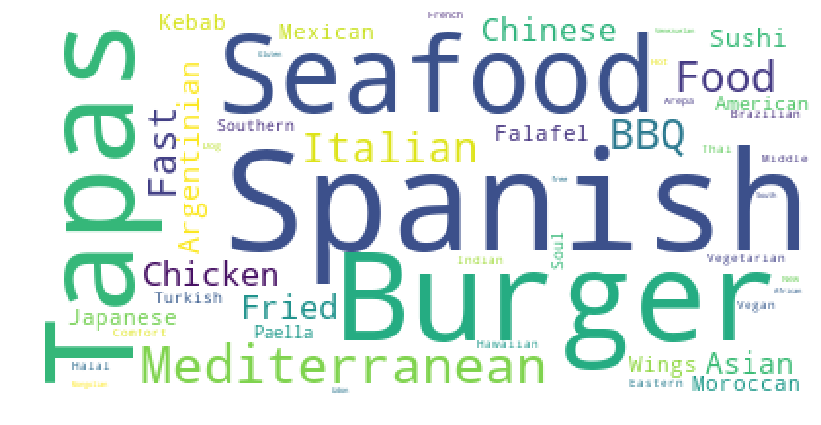

In [97]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [144]:
malaga_burger=malaga_jama[["Lugar","Latitud_lugar","Longitud_lugar","Categoría"]][malaga_jama["Categoría"]=='Burger Joint']
malaga_burger

,Lugar,Latitud_lugar,Longitud_lugar,Categoría
26,Hamburguesería Padilla,36.731815,-4.428139,Burger Joint
31,Asador Rosa,36.734648,-4.422583,Burger Joint
33,Pizzeria Picasso,36.738643,-4.422818,Burger Joint
38,Hamburgueseria Latino,36.735405,-4.421861,Burger Joint
39,Hamburguesería Arbe,36.733211,-4.431380,Burger Joint
54,Pizzeria Picasso,36.738643,-4.422818,Burger Joint
72,Burguer Jenny,36.745631,-4.426492,Burger Joint
79,puesto de Patatas Asadas,36.745541,-4.427246,Burger Joint
80,guanche 3,36.744750,-4.425019,Burger Joint
104,guanche 3,36.744750,-4.425019,Burger Joint


In [151]:
from folium.plugins import HeatMap

m=folium.Map([36.717448, -4.431831], 
             tiles = 'Stamen Toner',
             zoom_start=11)

heat_data = [[row['Latitud_lugar'],row['Longitud_lugar']] for index, row in malaga_burger.iterrows()]
#[row['Latitude'],row['Longitude']] for index, row in malaga_jama.iterrows()]

# plot heatmap
HeatMap(heat_data, min_opacity=0.5
       ).add_to(m)
m